In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import r2_score
from PrepareDataset import PrepareDataset, PrepareDatasetTimeDistributed

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/dataset.csv', header=0)

In [3]:
dataset = PrepareDataset(dataset=data)
dataset = dataset.early_preparation()
dataset = dataset.set_rows_to_zeros()
dataset = dataset.split_power()
dataset = dataset.standard_scaled_dataset()

test_dataset = dataset.test()

In [4]:
time_distributed_subseq2_dataset = PrepareDatasetTimeDistributed(dataset=data, subsequences=2)
time_distributed_subseq2_dataset = time_distributed_subseq2_dataset.early_preparation()
time_distributed_subseq2_dataset = time_distributed_subseq2_dataset.set_rows_to_zeros()
time_distributed_subseq2_dataset = time_distributed_subseq2_dataset.split_power()
time_distributed_subseq2_dataset = time_distributed_subseq2_dataset.standard_scaled_dataset()

time_distributed_subseq2_test_dataset = time_distributed_subseq2_dataset.test()

In [5]:
time_distributed_subseq3_dataset = PrepareDatasetTimeDistributed(dataset=data, subsequences=3)
time_distributed_subseq3_dataset = time_distributed_subseq3_dataset.early_preparation()
time_distributed_subseq3_dataset = time_distributed_subseq3_dataset.set_rows_to_zeros()
time_distributed_subseq3_dataset = time_distributed_subseq3_dataset.split_power()
time_distributed_subseq3_dataset = time_distributed_subseq3_dataset.standard_scaled_dataset()

time_distributed_subseq3_test_dataset = time_distributed_subseq3_dataset.test()

CNN Model

In [6]:
cnn_model = load_model('CNNModel.h5')

In [7]:
cnn_model_predictions = cnn_model.predict(test_dataset[0], verbose=0)[:,0]

In [8]:
cnn_model_r2_score = round(r2_score(test_dataset[1], cnn_model_predictions), 3)
cnn_model_r_score = round(np.sqrt(r2_score(test_dataset[1], cnn_model_predictions)), 3)

Simple RNN Model

In [9]:
simple_rnn_model = load_model('SimpleRNNModel.h5')

In [10]:
simple_rnn_model_predictions = simple_rnn_model.predict(test_dataset[0], verbose=0)[:,0]

In [11]:
simple_rnn_model_r2_score = round(r2_score(test_dataset[1], simple_rnn_model_predictions), 3)
simple_rnn_model_r_score = round(np.sqrt(r2_score(test_dataset[1], simple_rnn_model_predictions)), 3)

LSTM Model

In [12]:
lstm_model = load_model('LSTMModel.h5')

In [13]:
lstm_model_predictions = lstm_model.predict(test_dataset[0], verbose=0)[:,0]

In [14]:
lstm_model_r2_score = round(r2_score(test_dataset[1], lstm_model_predictions), 3)
lstm_model_r_score = round(np.sqrt(r2_score(test_dataset[1], lstm_model_predictions)), 3)

GRU Model

In [15]:
gru_model = load_model('GRUModel.h5')

In [16]:
gru_model_predictions = gru_model.predict(test_dataset[0], verbose=0)[:,0]

In [17]:
gru_model_r2_score = round(r2_score(test_dataset[1], gru_model_predictions), 3)
gru_model_r_score = round(np.sqrt(r2_score(test_dataset[1], gru_model_predictions)), 3)

CNN-LSTM Model with 2 subsequences

In [18]:
cnn_lstm_subseq2_model = load_model('CNNLSTMModelsubseq2.h5')

In [19]:
cnn_lstm_subseq2_model_predictions = cnn_lstm_subseq2_model.predict(time_distributed_subseq2_test_dataset[0], verbose=0)[:,0]

In [20]:
cnn_lstm_subseq2_model_r2_score = round(r2_score(time_distributed_subseq2_test_dataset[2], cnn_lstm_subseq2_model_predictions), 3)
cnn_lstm_subseq2_model_r_score = round(np.sqrt(r2_score(time_distributed_subseq2_test_dataset[2], cnn_lstm_subseq2_model_predictions)), 3)

CNN-LSTM Model with 3 subsequences

In [21]:
cnn_lstm_subseq3_model = load_model('CNNLSTMModelsubseq3.h5')

In [22]:
cnn_lstm_subseq3_model_predictions = cnn_lstm_subseq3_model.predict(time_distributed_subseq3_test_dataset[0], verbose=0)[:,0]

In [23]:
cnn_lstm_subseq3_model_r2_score = round(r2_score(time_distributed_subseq3_test_dataset[2], cnn_lstm_subseq3_model_predictions), 3)
cnn_lstm_subseq3_model_r_score = round(np.sqrt(r2_score(time_distributed_subseq3_test_dataset[2], cnn_lstm_subseq3_model_predictions)), 3)

In [24]:
models_metrics = {'CNN': [cnn_model_r2_score, cnn_model_r_score],
                    'Simple RNN': [simple_rnn_model_r2_score, simple_rnn_model_r_score],
                    'LSTM': [lstm_model_r2_score, lstm_model_r_score],
                    'GRU': [gru_model_r2_score, gru_model_r_score],
                    'CNN-LSTM (2)': [cnn_lstm_subseq2_model_r2_score, cnn_lstm_subseq2_model_r_score],
                    'CNN-LSTM (3)': [cnn_lstm_subseq3_model_r2_score, cnn_lstm_subseq3_model_r_score]}

models_metrics = sorted(models_metrics.items(), key=lambda item: item[1][0])
models_metrics = dict(models_metrics)

colors = ['palegreen', 'lightgreen', 'lime', 'limegreen', 'forestgreen', 'darkgreen']

In [25]:
r2_scores = [metrics[0] for metrics in models_metrics.values()]
r_scores = [metrics[1] for metrics in models_metrics.values()]
models = list(models_metrics.keys())

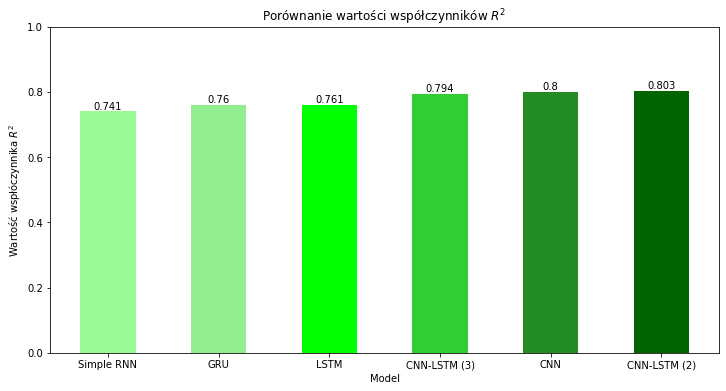

In [26]:
plt.bar(models, r2_scores, width=0.5, color=colors)

for i in range(len(r2_scores)):
    plt.text(models[i], r2_scores[i], s=str(r2_scores[i]), horizontalalignment='center', verticalalignment='bottom')

fig = plt.gcf()
fig = fig.set_size_inches(12,6)
plt.ylim([0, 1])
plt.title('Porównanie wartości współczynników $ R^2 $')
plt.xlabel('Model')
plt.ylabel('Wartość wspłóczynnika $ R^2 $')
plt.show()

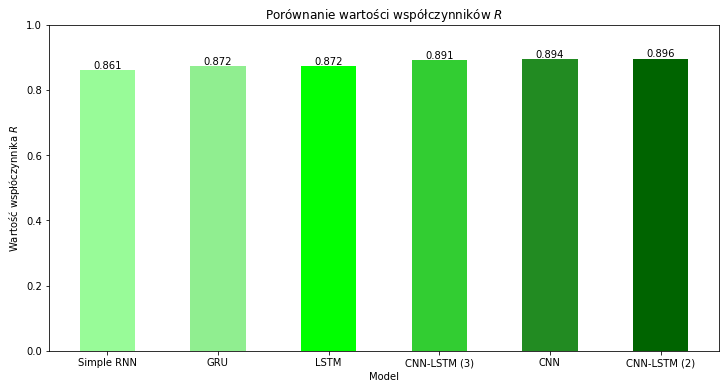

In [27]:
plt.bar(models, r_scores, width=0.5, color=colors)

for i in range(len(r_scores)):
    plt.text(models[i], r_scores[i], s=str(r_scores[i]), horizontalalignment='center', verticalalignment='bottom')

fig = plt.gcf()
fig = fig.set_size_inches(12,6)
plt.ylim([0, 1])
plt.title('Porównanie wartości współczynników $ R $')
plt.xlabel('Model')
plt.ylabel('Wartość wspłóczynnika $ R $')
plt.show()